In [1]:
from ultralytics import YOLO

In [2]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import shutil
import sys

In [3]:
sys.path.append(os.path.join(os.getcwd(), ".."))

In [4]:
model = YOLO(os.path.join("..", "weights", "noorkhokhar99", "fall_det_1.pt"))

c:\Users\tsfai\Projects\data-slayer-2.0\venv\Lib\site-packages\ultralytics\nn\tasks.py:714: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_locatio


image 1/1 c:\Users\tsfai\Projects\data-slayer-2.0\notebooks\..\data\train\subject-1\fall\1_backward_falls\frame042.jpg: 384x640 1 Fall-Detected, 51.9ms
Speed: 0.0ms preprocess, 51.9ms inference, 58.2ms postprocess per image at shape (1, 3, 384, 640)


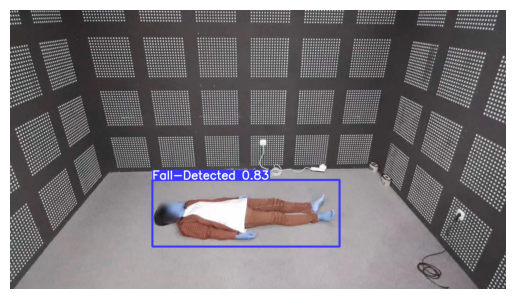

In [5]:
image = '..\\data\\train\\subject-1\\fall\\1_backward_falls\\frame042.jpg'
results = model(image)        
annotated_image = results[0].plot()

plt.imshow(annotated_image)
plt.axis('off')
plt.show()

In [ ]:
# Get bounding boxes from images
from utils.bounding_box import get_bounding_box, visualize_bbox

In [63]:
def create_yolo_dataset(dataframe, output_dir, train_ratio=0.8):
    train_df, val_df = train_test_split(dataframe, train_size=train_ratio, random_state=42, stratify=dataframe['label'])

    train_img_dir = os.path.join(output_dir, "images/train")
    val_img_dir = os.path.join(output_dir, "images/val")
    train_label_dir = os.path.join(output_dir, "labels/train")
    val_label_dir = os.path.join(output_dir, "labels/val")
    
    os.makedirs(train_img_dir, exist_ok=True)
    os.makedirs(val_img_dir, exist_ok=True)
    os.makedirs(train_label_dir, exist_ok=True)
    os.makedirs(val_label_dir, exist_ok=True)
    
    def process_split(data_split, img_dir, label_dir):
        for _, row in data_split.iterrows():
            src_image_path = os.path.join("..", row['path'])
            
            if not os.path.exists(src_image_path):
                raise FileNotFoundError(f"File not found: {src_image_path}")
            
            new_file_name = row['path'].replace('/', '_').replace('\\', '_')
            dst_image_path = os.path.join(img_dir, new_file_name)

            shutil.copy2(src_image_path, dst_image_path)
            
            label_file_path = os.path.join(label_dir, os.path.splitext(new_file_name)[0] + ".txt")
            
            with open(label_file_path, "w") as f:
                if row['label'] == 1:  
                    class_id = 0  
                    bbox = get_bounding_box(image_path=src_image_path[3:])
                    if bbox is not None:
                        f.write(f"{class_id} {' '.join(map(str, bbox))}\n")
                    else:
                        f.write('')
    
    process_split(train_df, train_img_dir, train_label_dir)
    process_split(val_df, val_img_dir, val_label_dir)

In [7]:
data_train = pd.read_csv("../data/revalidated/data_train_f_001.csv")
data_train.head()

,path,label,conf,revalidated_manually
0,.\data\train\subject-1\fall\1_backward_falls\f...,0,0.000000,1
1,.\data\train\subject-1\fall\1_backward_falls\f...,0,0.000000,1
2,.\data\train\subject-1\fall\1_backward_falls\f...,1,0.444923,1
3,.\data\train\subject-1\fall\1_backward_falls\f...,1,0.616470,1
4,.\data\train\subject-1\fall\1_backward_falls\f...,0,0.000000,1


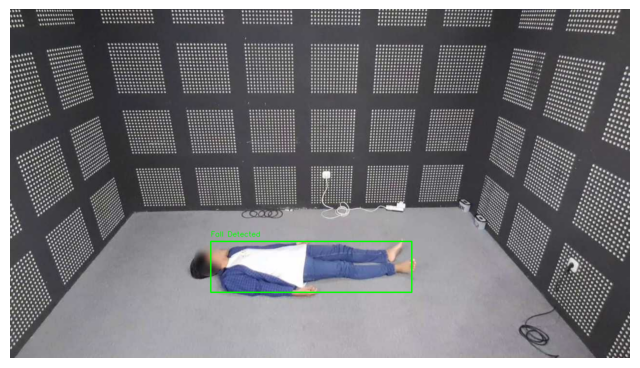

In [40]:
bbox = get_bounding_box(image_path=image[3:])
visualize_bbox(image[3:], bbox, label="Fall Detected")

In [64]:
output_directory = "../yolo_dataset"
create_yolo_dataset(data_train, output_directory)

In [ ]:
dataset_dirs = [
    "C:/Users/tsfai/Projects/data-slayer-2.0/yolo_dataset/train/images",
    "C:/Users/tsfai/Projects/data-slayer-2.0/yolo_dataset/train/labels",
    "C:/Users/tsfai/Projects/data-slayer-2.0/yolo_dataset/val/images",
    "C:/Users/tsfai/Projects/data-slayer-2.0/yolo_dataset/val/labels"
]

def remove_leading_dot_from_files(directory):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        
        if filename.startswith(".") and os.path.isfile(file_path):
            new_filename = filename[1:]
            new_file_path = os.path.join(directory, new_filename)
            
            # Ganti nama file
            os.rename(file_path, new_file_path)
            print(f"Renamed: {file_path} -> {new_file_path}")

for directory in dataset_dirs:
    if os.path.exists(directory):
        remove_leading_dot_from_files(directory)
    else:
        print(f"Directory not found: {directory}")

In [78]:
len(os.listdir("../yolo_dataset/train/images")) + len(os.listdir("../yolo_dataset/val/images")) == len(data_train)

True

In [4]:
yolo = YOLO('../weights/noorkhokhar99/fall_det_1.pt')

c:\Users\tsfai\Projects\data-slayer-2.0\venv\Lib\site-packages\ultralytics\nn\tasks.py:714: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_locatio

In [5]:
yolo.train(data='C:/Users/tsfai/Projects/data-slayer-2.0/yolo_dataset/data.yaml', epochs=5, imgsz=416)

New https://pypi.org/project/ultralytics/8.3.54 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.30 🚀 Python-3.12.8 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
engine\trainer: task=detect, mode=train, model=../weights/noorkhokhar99/fall_det_1.pt, data=C:/Users/tsfai/Projects/data-slayer-2.0/yolo_dataset/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnosti

c:\Users\tsfai\Projects\data-slayer-2.0\venv\Lib\site-packages\ultralytics\nn\tasks.py:714: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_locatio

AMP: checks passed ✅


c:\Users\tsfai\Projects\data-slayer-2.0\venv\Lib\site-packages\ultralytics\engine\trainer.py:276: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning C:\Users\tsfai\Projects\data-slayer-2.0\yolo_dataset\train\labels.cache... 3435 images, 2429 backgrounds, 0 corrupt: 100%|██████████| 3435/3435 [00:00<?, ?it/s]
val: Scanning C:\Users\tsfai\Projects\data-slayer-2.0\yolo_dataset\val\labels.cache... 859 images, 599 backgrounds, 0 corrupt: 100%|██████████| 859/859 [00:00<?, ?it/s]


Plotting labels to C:\Users\tsfai\Projects\Fall_Detection_Using_Yolov8\runs\detect\train10\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to C:\Users\tsfai\Projects\Fall_Detection_Using_Yolov8\runs\detect\train10
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      1.85G      1.921      1.763      1.583          4        416: 100%|██████████| 215/215 [01:05<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.31it/s]

                   all        859        260      0.929      0.873      0.908      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      1.91G      1.208     0.9047      1.082          4        416: 100%|██████████| 215/215 [01:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.30it/s]

                   all        859        260      0.945      0.908      0.967      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      1.91G       1.08     0.8092      1.035          4        416: 100%|██████████| 215/215 [01:04<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.37it/s]

                   all        859        260      0.932      0.952      0.974      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      1.91G     0.9686     0.7559     0.9879          1        416: 100%|██████████| 215/215 [01:04<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.80it/s]

                   all        859        260      0.937      0.969      0.978      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      1.89G     0.9008     0.6836     0.9827          8        416: 100%|██████████| 215/215 [01:05<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.76it/s]

                   all        859        260      0.927      0.975      0.979      0.801



5 epochs completed in 0.099 hours.
Optimizer stripped from C:\Users\tsfai\Projects\Fall_Detection_Using_Yolov8\runs\detect\train10\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\tsfai\Projects\Fall_Detection_Using_Yolov8\runs\detect\train10\weights\best.pt, 22.5MB

Validating C:\Users\tsfai\Projects\Fall_Detection_Using_Yolov8\runs\detect\train10\weights\best.pt...
Ultralytics YOLOv8.1.30 🚀 Python-3.12.8 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.62it/s]


                   all        859        260      0.937      0.969      0.978      0.838
Speed: 0.1ms preprocess, 3.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to C:\Users\tsfai\Projects\Fall_Detection_Using_Yolov8\runs\detect\train10


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001D20FEC0560>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [ ]:
valid_results = yolo.val()
print(valid_results)

Ultralytics YOLOv8.1.30 🚀 Python-3.12.8 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning C:\Users\tsfai\Projects\data-slayer-2.0\yolo_dataset\val\labels.cache... 859 images, 599 backgrounds, 0 corrupt: 100%|██████████| 859/859 [00:00<?, ?it/s]


In [3]:
yolo_best = YOLO("../weights/weights_007_yolo_best.pt")

c:\Users\tsfai\Projects\data-slayer-2.0\venv\Lib\site-packages\ultralytics\nn\tasks.py:714: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_locatio

In [6]:
test_data = pd.read_csv("../data/sample_submission.csv")
test_data.head()

,id,label
0,4a73abcd02.jpg,0
1,266bdb8d70.jpg,0
2,1389b9fb66.jpg,0
3,7e1c35f2e6.jpg,0
4,8271bebf8f.jpg,0


In [19]:
for i, image in enumerate(test_data.iloc[:, 0].values):
    path = os.path.join("..", "data", "test", image)
    results = yolo_best(path)

    test_data.iloc[i, 1] = int(len(results[0].boxes) > 0)


image 1/1 c:\Users\tsfai\Projects\data-slayer-2.0\notebooks\..\data\test\4a73abcd02.jpg: 256x416 (no detections), 9.7ms
Speed: 81.5ms preprocess, 9.7ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 416)

image 1/1 c:\Users\tsfai\Projects\data-slayer-2.0\notebooks\..\data\test\266bdb8d70.jpg: 256x416 (no detections), 13.3ms
Speed: 0.0ms preprocess, 13.3ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 416)

image 1/1 c:\Users\tsfai\Projects\data-slayer-2.0\notebooks\..\data\test\1389b9fb66.jpg: 256x416 (no detections), 14.6ms
Speed: 0.0ms preprocess, 14.6ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 416)

image 1/1 c:\Users\tsfai\Projects\data-slayer-2.0\notebooks\..\data\test\7e1c35f2e6.jpg: 256x416 (no detections), 8.4ms
Speed: 0.0ms preprocess, 8.4ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 416)

image 1/1 c:\Users\tsfai\Projects\data-slayer-2.0\notebooks\..\data\test\8271bebf8f.jpg: 256x416 1 fall, 8.4ms
Speed: 4.5ms pr

In [23]:
test_data.to_csv("../data/submissions/007.csv", index=False)

In [4]:
yolo_best.train(data='C:/Users/tsfai/Projects/data-slayer-2.0/yolo_dataset/data.yaml', epochs=5, imgsz=416)

New https://pypi.org/project/ultralytics/8.3.54 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.30 🚀 Python-3.12.8 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
engine\trainer: task=detect, mode=train, model=../weights/weights_007_yolo_best.pt, data=C:/Users/tsfai/Projects/data-slayer-2.0/yolo_dataset/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_n

c:\Users\tsfai\Projects\data-slayer-2.0\venv\Lib\site-packages\ultralytics\nn\tasks.py:714: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_locatio

AMP: checks passed ✅


c:\Users\tsfai\Projects\data-slayer-2.0\venv\Lib\site-packages\ultralytics\engine\trainer.py:276: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning C:\Users\tsfai\Projects\data-slayer-2.0\yolo_dataset\train\labels.cache... 3435 images, 2429 backgrounds, 0 corrupt: 100%|██████████| 3435/3435 [00:00<?, ?it/s]
val: Scanning C:\Users\tsfai\Projects\data-slayer-2.0\yolo_dataset\val\labels.cache... 859 images, 599 backgrounds, 0 corrupt: 100%|██████████| 859/859 [00:00<?, ?it/s]


Plotting labels to C:\Users\tsfai\Projects\Fall_Detection_Using_Yolov8\runs\detect\train12\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to C:\Users\tsfai\Projects\Fall_Detection_Using_Yolov8\runs\detect\train12
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      1.85G     0.8396     0.6172     0.9554          4        416: 100%|██████████| 215/215 [00:56<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.18it/s]

                   all        859        260      0.936      0.942      0.968      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      1.91G     0.8863     0.6405      0.971          4        416: 100%|██████████| 215/215 [00:52<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.40it/s]

                   all        859        260      0.917      0.946      0.968      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      1.91G     0.8589      0.637       0.96          4        416: 100%|██████████| 215/215 [00:51<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.25it/s]

                   all        859        260      0.909      0.956      0.968      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5       1.9G      0.816     0.6199     0.9431          1        416: 100%|██████████| 215/215 [00:55<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.82it/s]

                   all        859        260      0.936      0.965      0.979      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5       1.9G      0.819     0.6259     0.9575          8        416: 100%|██████████| 215/215 [00:53<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.07it/s]

                   all        859        260      0.936      0.961      0.978      0.833



5 epochs completed in 0.084 hours.
Optimizer stripped from C:\Users\tsfai\Projects\Fall_Detection_Using_Yolov8\runs\detect\train12\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\tsfai\Projects\Fall_Detection_Using_Yolov8\runs\detect\train12\weights\best.pt, 22.5MB

Validating C:\Users\tsfai\Projects\Fall_Detection_Using_Yolov8\runs\detect\train12\weights\best.pt...
Ultralytics YOLOv8.1.30 🚀 Python-3.12.8 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.25it/s]


                   all        859        260      0.936      0.961      0.978      0.833
Speed: 0.1ms preprocess, 2.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to C:\Users\tsfai\Projects\Fall_Detection_Using_Yolov8\runs\detect\train12


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000016F27FD0E30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [5]:
yolo_best = YOLO("../weights/weights_008_yolo_best.pt")

In [7]:
for i, image in enumerate(test_data.iloc[:, 0].values):
    path = os.path.join("..", "data", "test", image)
    results = yolo_best(path)

    test_data.iloc[i, 1] = int(len(results[0].boxes) > 0)


image 1/1 c:\Users\tsfai\Projects\data-slayer-2.0\notebooks\..\data\test\4a73abcd02.jpg: 256x416 (no detections), 84.2ms
Speed: 2.3ms preprocess, 84.2ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 416)

image 1/1 c:\Users\tsfai\Projects\data-slayer-2.0\notebooks\..\data\test\266bdb8d70.jpg: 256x416 (no detections), 10.4ms
Speed: 1.0ms preprocess, 10.4ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

image 1/1 c:\Users\tsfai\Projects\data-slayer-2.0\notebooks\..\data\test\1389b9fb66.jpg: 256x416 (no detections), 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

image 1/1 c:\Users\tsfai\Projects\data-slayer-2.0\notebooks\..\data\test\7e1c35f2e6.jpg: 256x416 (no detections), 13.6ms
Speed: 1.3ms preprocess, 13.6ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 416)

image 1/1 c:\Users\tsfai\Projects\data-slayer-2.0\notebooks\..\data\test\8271bebf8f.jpg: 256x416 1 fall, 10.9ms
Speed: 1.0m

In [17]:
test_data.to_csv("../data/submissions/008_yolo.csv", index=False)

id       0d8031f778.jpg
label                 1
Name: 2148, dtype: object